# Sample notebook to load and plot a single Moana Project hindcast netCDF file

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import dask
%matplotlib inline

In [2]:
# load sample Moana backbone (hindcast) model data file,
# using chunking to keep opendap from returning an error due to large file sizes
url = 'http://thredds.moanaproject.org:8080/thredds/dodsC/moana/ocean/NZB/v1.9/processed_3D/nz5km20171201_00z_3D.nc'
ds = xr.open_dataset(url, chunks={'time':1})

/home/jjakoboski/.virtualenvs/moana_notebook/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


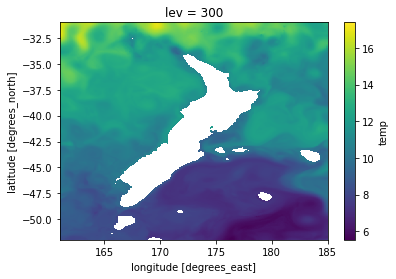

In [3]:
# choose a depth level and calculate mean over time
da = ds.sel(lev=300)
time_mean_300m = da.mean(dim='time')
# plot time-mean temperature at the depth chosen above
time_mean_300m['temp'].plot.pcolormesh()